# <font style="color:black">Getting Started with Images</font>
This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, we cover the following topics:

* Reading an image 
* Check image attributes like datatype and shape 
* Matrix representation of an image in Numpy
* Accessing and manipulating images pixels
* Color Images and splitting/merging image channels
* Displaying images using matplotlib
* Saving images
* Image cropping
* Image resizing
* Image flipping

Let's get started :)

##  <font style="color:black">Import Libraries</font>

In [6]:
import cv2 #opencv
import numpy as np #useful for manipulating image arrays
import matplotlib.pyplot as plt #needed for plotting (within Jupyter)
#these allows for images to be shown
# from PIL import Image  
from IPython.display import Image
%matplotlib inline

##  <font style="color:black">Display Image Directly</font>
We will use the following as our sample images. We will use the ipython image function to load and display the image.

In [7]:
# Display 18x18 pixel image.
Image(filename='checkerboard_18x18.png') 

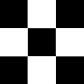

In [9]:
# Display 84x84 pixel image.
Image(filename='checkerboard_84x84.jpg') 


# <font style="color:black">Reading images using OpenCV</font>

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="green">Function Syntax </font>
``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.
2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### <font color="green">OpenCV Documentation</font>

**`Imread:`**https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56

**`ImreadModes:`** https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80


In [10]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png",0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## Display Image attributes

In [11]:
# print the size  of image
print("Image size is ", cb_img.shape)

# print data-type of image
print("Data type of image is ", cb_img.dtype)

Image size is  (18, 18)
Data type of image is  uint8


## Display Images using Matplotlib

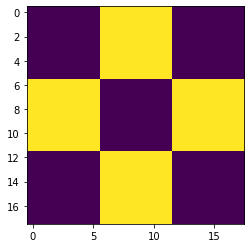

In [12]:
# Display image.
plt.imshow(cb_img)

### What happened?
Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. matplotlib uses different color maps and it's possible that the gray scale color map is not set.

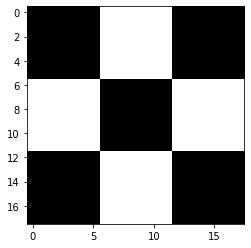

In [13]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')

## Another example

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

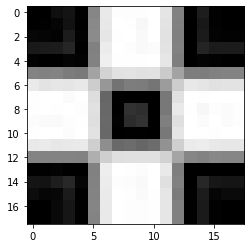

In [14]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg",0)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy,cmap='gray')

Now, let's go back to our original image

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

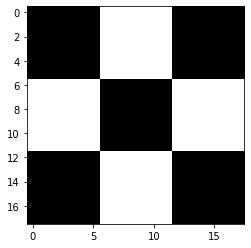

In [26]:
plt.imshow(cb_img, cmap='gray')
print(cb_img)

## Accessing Individual Pixels
Let us see how to access a pixel in the image.

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed. 

For example, if you want to access the first pixel, you need to specify matrix[0,0]. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.

In [28]:
# print the first pixel of the first black box
print(cb_img[0,0])
# print the first white pixel to the right of the first black box
print(cb_img[0,6])

0
255


## <font style="color:black">Modifying Image Pixels</font>
We can modify the intensity values of pixels by accessing them in the same manner as described above.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

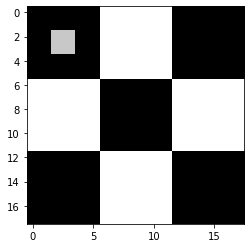

In [29]:
#first let's make a copy of the image
cb_img_copy = cb_img.copy()
#and then modify these four pixels
cb_img_copy[2,2] = 200
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 200
cb_img_copy[3,3] = 200

# We can also utilise indexing to modify a whole chunk together. This is the same as above.
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap='gray')
print(cb_img_copy)

## Working with Color Images
Until now, we have been using gray scale images in our discussion. Let us now discuss color images.

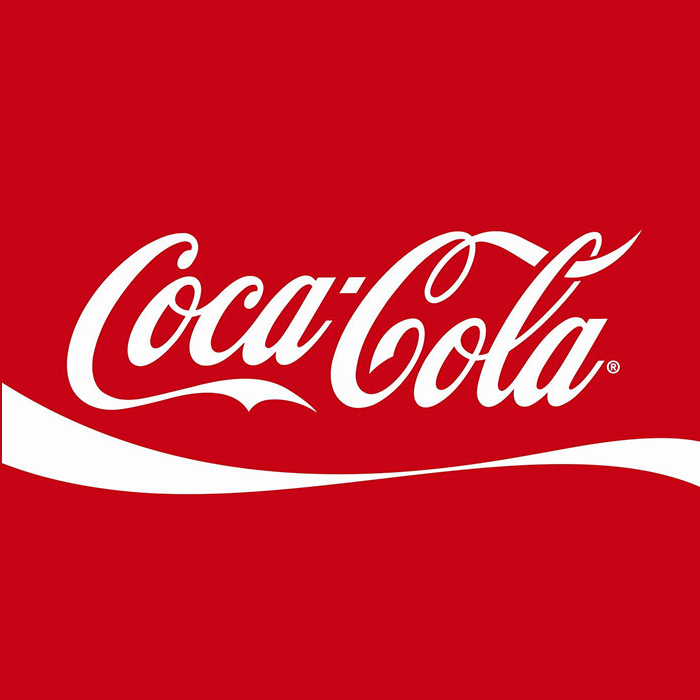

In [15]:
# Read and display Coca-Cola logo.
Image("coca-cola-logo.png")

## Read and display color image
Let us read a color image and check the parameters. Note the image dimension.

In [16]:
# Read in image
coke_img = cv2.imread("coca-cola-logo.png",1)

# print the size  of image
print("Image size is ", coke_img.shape)

# print data-type of image
print("Data type of image is ", coke_img.dtype)

print("")

Image size is  (700, 700, 3)
Data type of image is  uint8



## Display the Image

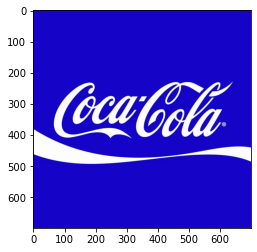

In [17]:
plt.imshow(coke_img)

####  What happened?
The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. *We will discuss about the channels in the sections below.*

##### Why BGR? 
The reason the early developers at OpenCV chose BGR color format is that back then BGR color format was popular among camera manufacturers and software providers. E.g. in Windows, when specifying color value using COLORREF they use the BGR format 0x00bbggrr. Basically, BGR was a choice made for historical reasons and now we have to live with it.🤦🏽‍♂️

In [18]:
#We can use slicing to reverse this
#E.g. if we have the following array
example_array = [11, 22, 33, 44, 55]
print("Array is :",example_array)
 
reversed_example_array = example_array[::-1] #reversing using list slicing and saving result to new array
print("Resultant new reversed array:",reversed_example_array)

Array is : [11, 22, 33, 44, 55]
Resultant new reversed array: [55, 44, 33, 22, 11]


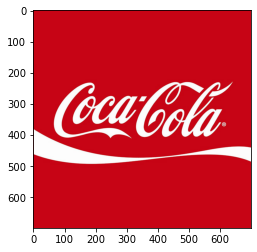

In [19]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

## Splitting and Merging Color Channels


**`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

**`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a


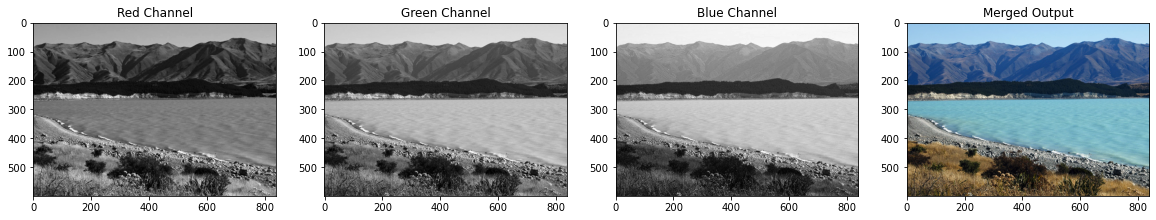

In [20]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
# imgMerged_RGB = cv2.cvtColor(imgMerged, cv2.COLOR_BGR2RGB)
# Show the merged output
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

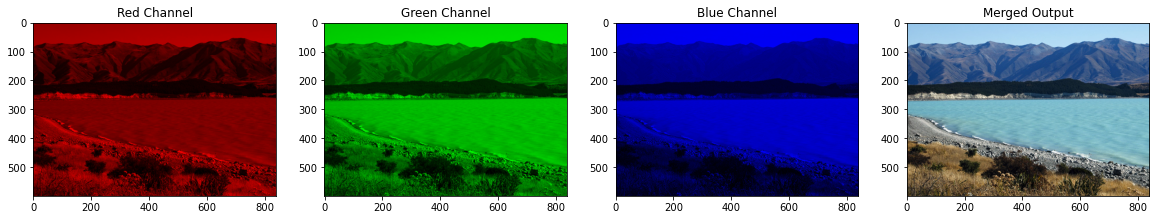

In [21]:
blank = np.zeros(img_NZ_bgr.shape[:2], dtype='uint8')
red = cv2.merge([r,blank,blank])
green = cv2.merge([blank,g,blank])
blue = cv2.merge([blank,blank,b])

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(red);plt.title("Red Channel");
plt.subplot(142);plt.imshow(green);plt.title("Green Channel");
plt.subplot(143);plt.imshow(blue);plt.title("Blue Channel");
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

# imgMerged_RGB = cv2.cvtColor(imgMerged, cv2.COLOR_BGR2RGB)
# plt.subplot(144);plt.imshow(imgMerged_RGB);plt.title("Merged Output");


## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
2. `code` color space conversion code (see ColorConversionCodes). 

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`cv2.cvtColor:`** https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab
**`ColorConversionCodes:`** https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0

### Changing from BGR to RGB

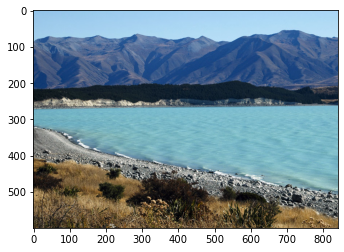

In [22]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

### Changing to HSV color space

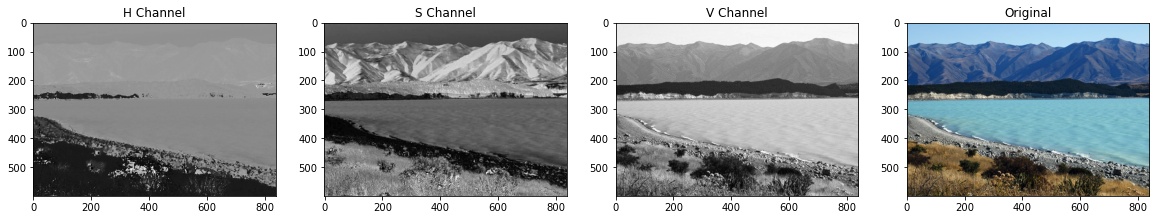

In [23]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)
# Split the image into the H,S,V components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");


## Modifying individual Channel

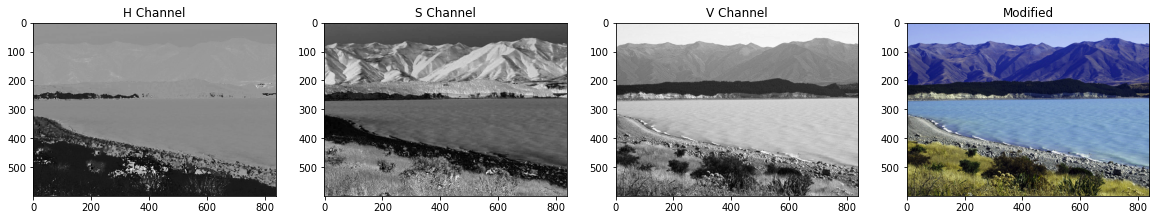

In [32]:
h_new = h+10
img_NZ_merged = cv2.merge((h_new,s,v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Modified");

In [33]:
print ("For pixel 0,10")
print ("HSV channels: ", img_hsv[0,10])
print ("New HSV channels: ", img_NZ_merged[0,10])
print ("RGB channels: ", img_NZ_bgr[0,10,::-1])
print ("New RGB channels: ", img_NZ_rgb[0,10])


For pixel 0,10
HSV channels:  [103  95 232]
New HSV channels:  [113  95 232]
RGB channels:  [146 194 232]
New RGB channels:  [145 165 232]


## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

	
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path. 
2. `img`: Image or Images to be saved.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`Imwrite:`** https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce
**`ImwriteFlags:`**https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac

In [ ]:
# save the image
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename='New_Zealand_Lake_SAVED.png') 

In [ ]:
# read the image as Color
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape is: ", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape is: ", img_NZ_gry.shape)

# Cropping Images

Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

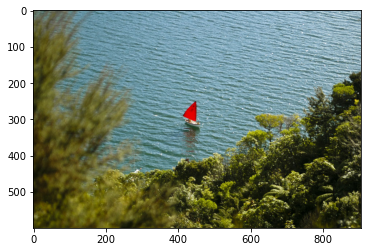

In [35]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg",cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:,:,::-1] 

plt.imshow(img_NZ_rgb)

In [38]:
img_NZ_rgb.shape

(600, 903, 3)

### <font color="green">Crop out the middle region of the image</font>

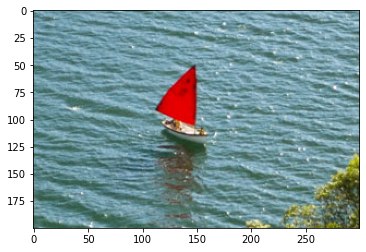

In [36]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

In [37]:
cropped_region.shape

(200, 300, 3)

# Resizing Images

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜
2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`resize():`** https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

### <font color="green"> Method 1: Specifying Scaling Factor using fx and fy


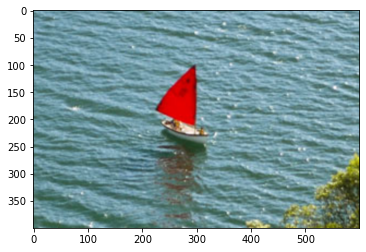

In [39]:
resized_cropped_region_2x = cv2.resize(cropped_region,None,fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

In [40]:
resized_cropped_region_2x.shape

(400, 600, 3)

### <font style="color:rgb(8,133,37)">Let's actually show the cropped and resized images so you can see the scale difference.</font>


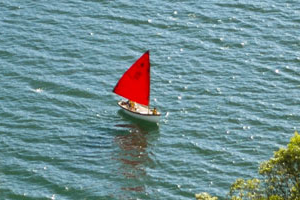

In [51]:
# For Cropped Image
# Swap channel order
cropped_region = cropped_region[:,:,::-1]

# Save cropped 'region'
cv2.imwrite("cropped_region.png", cropped_region)

# Display the cropped and resized image
Image(filename='cropped_region.png') 

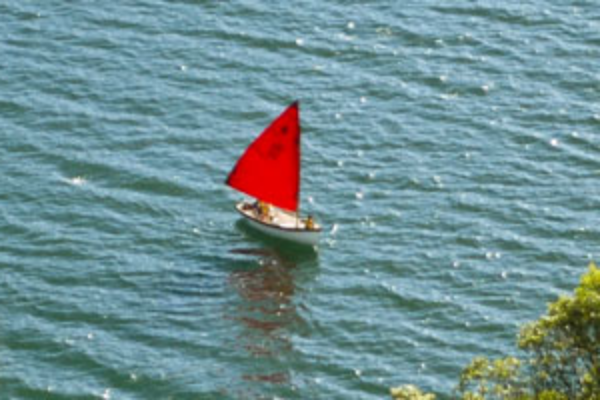

In [53]:
# For resized (cropped) image
# Swap channel order
resized_cropped_region_2x = resized_cropped_region_2x[:,:,::-1]
#you can also use resized_cropped_region_2x = cv2.cvtColor(resized_cropped_region_2x, cv2.COLOR_BGR2RGB)

# Save resized image to disk
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

# Display the cropped and resized image
Image(filename='resized_cropped_region_2x.png') 

### <font color="green">Method 2: Specifying exact size of the output image</font>


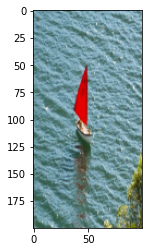

In [44]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize  image to same size as dim above
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

In [45]:
resized_cropped_region.shape

(200, 100, 3)

### <font color="green">Resize while maintaining aspect ratio</font>


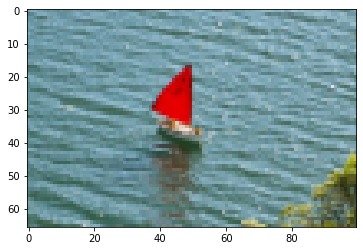

In [47]:
# Still method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region_with_ratio = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region_with_ratio)

In [48]:
resized_cropped_region_with_ratio.shape

(66, 100, 3)

# Flipping Images


The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`flip:`** https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441

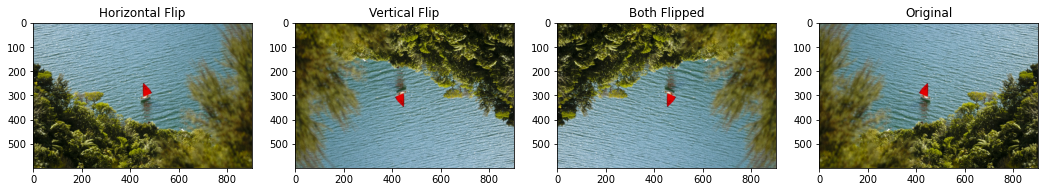

In [55]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");
